In [522]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [523]:
df = pd.read_csv('./data/train.csv')

In [524]:
df = pd.read_csv('./data/train.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)
df['day'] = pd.to_datetime(df['datetime']).dt.dayofyear
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df.drop('datetime', axis=1, inplace=True)

<AxesSubplot:>

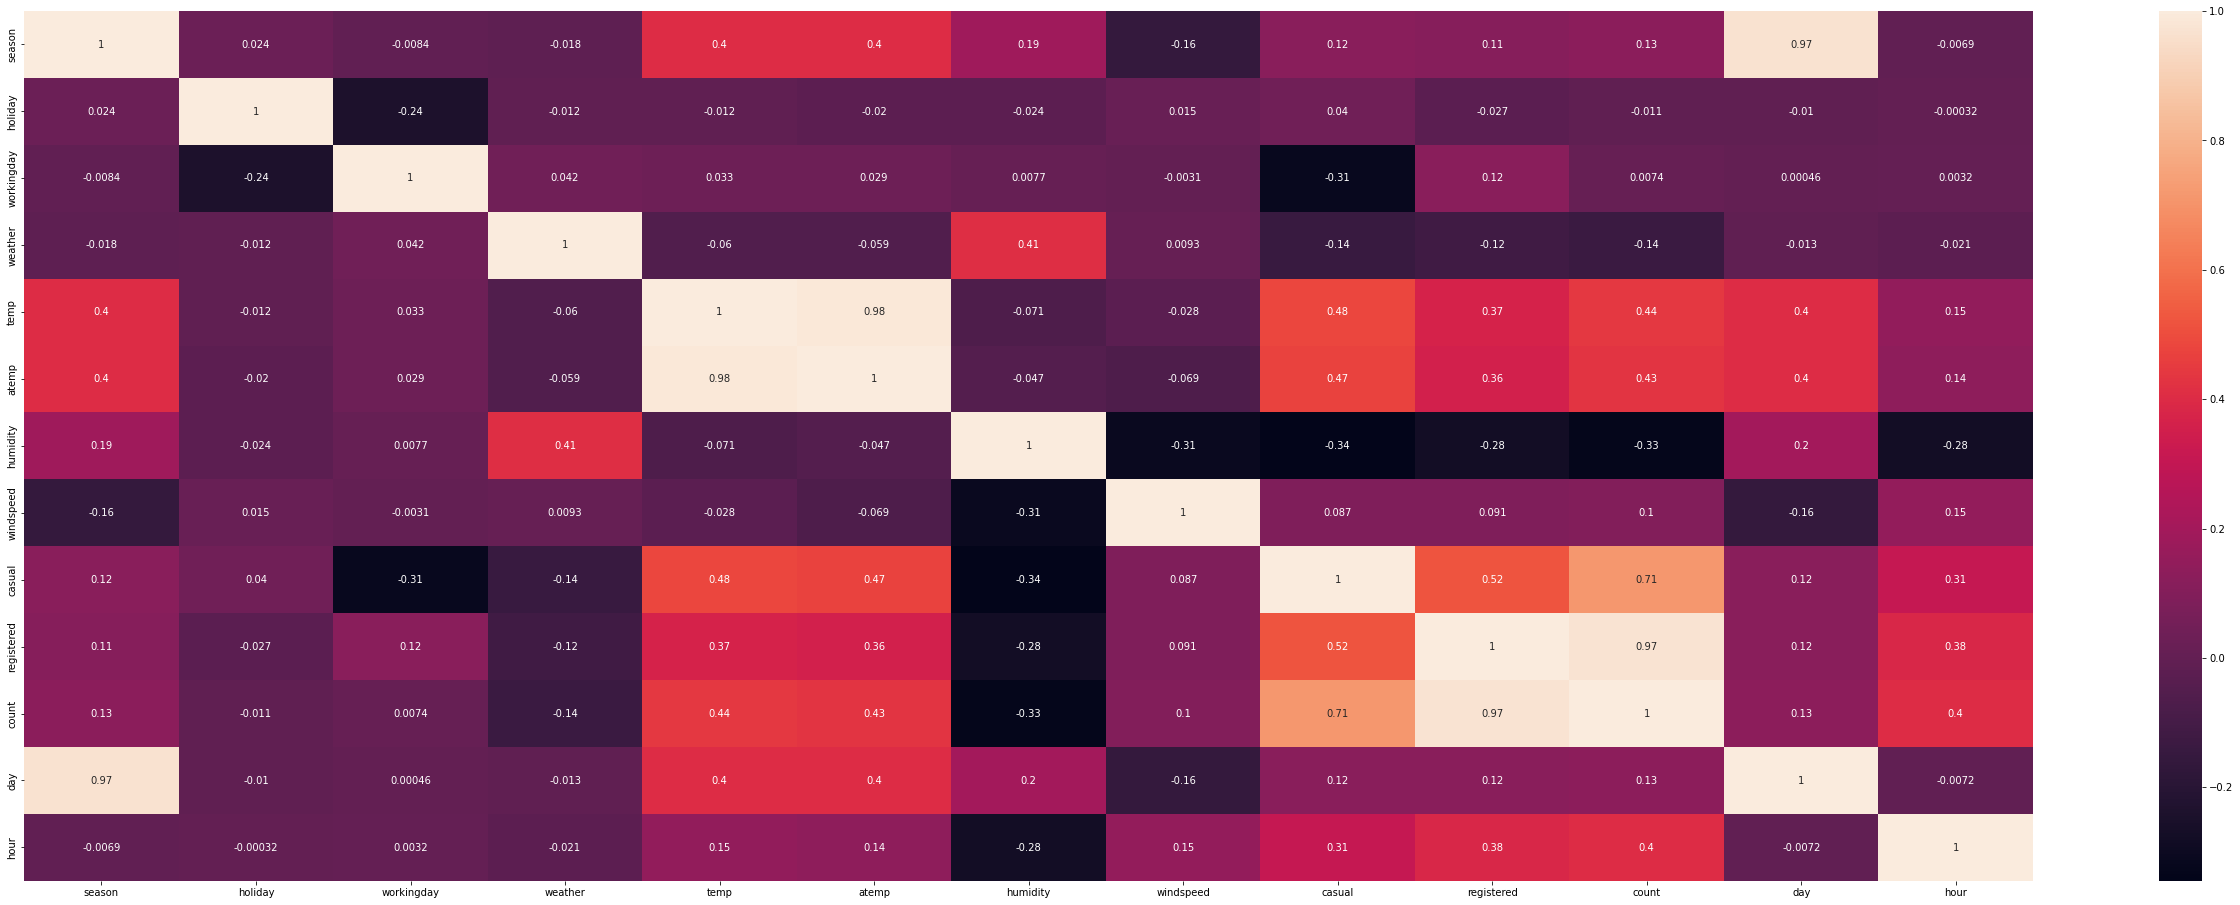

In [525]:
plt.figure(figsize=(45,16))
sns.heatmap(df.corr(), annot=True)

# Vacance aux USA : 

Noel = 23.12.2021 à 02.01.2022 dt => 357 to 2 

Vacance de sport : 21.02.2022 à 25.02.2022 => 52 to 56 

formation continue pour enseignants : 10.03.2022 à 11.03.2022 => 69 to 70 

vacance de pringtemps : 11.04.2022 à 18.04.2022 => 101  to 108 

Vacance été : 04.07.2022 à 28.08.2022 => 185 to 240 

Vacance automne : 06.10.2022 à 10.10.2022 => 279 to 283 

11.11.2022 à 25.11.2022 => 315 to 329 

22.12.222 à 02.01.2023 => 356 to 32 




# Férié 
01.17.2022 => 17 

01.26.2022 => 26 

05.30.2022 => 150

09.05.2022 => 129  

11.01.2022 => 305 

11.04.2022 => 308 



In [526]:
df2 = df.drop(columns=['registered', 'casual'], index=1)

In [527]:
df2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,1,0
2,1,0,0,1,9.02,13.635,80,0.0000,32,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...
9058,3,0,0,2,26.24,30.305,73,8.9981,341,232,19
9059,3,0,0,2,26.24,30.305,73,12.9980,274,232,20
9060,3,0,0,3,25.42,29.545,78,6.0032,190,232,21
9061,3,0,0,2,25.42,29.545,78,11.0014,56,232,22


In [528]:
df_test = pd.read_csv('./data/test.csv')
df_test.drop('Unnamed: 0', axis=1, inplace = True)
df_test['day'] = pd.to_datetime(df_test['datetime']).dt.dayofyear
df_test['hour'] = pd.to_datetime(df_test['datetime']).dt.hour
df_test.drop('datetime', axis=1, inplace=True)
df_test = df_test.drop(columns=['casual','registered'], axis=1)
df_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour
0,3,0,0,1,30.34,34.090,62,7.0015,168,245,0
1,3,0,0,1,29.52,34.850,74,8.9981,79,245,1
2,3,0,0,1,28.70,32.575,70,11.0014,69,245,2
3,3,0,0,1,28.70,32.575,70,7.0015,35,245,3
4,3,0,0,1,28.70,32.575,70,0.0000,12,245,4
...,...,...,...,...,...,...,...,...,...,...,...
1818,4,0,1,1,15.58,19.695,50,26.0027,336,354,19
1819,4,0,1,1,14.76,17.425,57,15.0013,241,354,20
1820,4,0,1,1,13.94,15.910,61,15.0013,168,354,21
1821,4,0,1,1,13.94,17.425,61,6.0032,129,354,22


----------------------------------------------------------------

In [529]:
# Faire un datafram avec les conditions pour les bonnes colonnes + récupérer les API 
# 1 : Pringtemps -- 2 : ete -- 3: Automne - 4 : hiver 

In [530]:
df_app = pd.DataFrame(columns=df2.keys(), index=np.arange(1,5,1))

In [531]:
df_app.drop('count', axis =1, inplace=True)

------------------------------------

--> Pipeline pour creation du df 

In [537]:
import numpy as np
import pandas as pd 
import datetime as dt 


# Day of year 
df_app['day'] = pd.to_datetime('today').normalize().dayofyear

# Season 
df_app['season'][df_app['day'] < 172 ] = 1
df_app['season'][(df_app['day'] >= 172) & (df_app['day'] < 264 ) ] = 2
df_app['season'][(df_app['day'] >= 264) & (df_app['day'] < 356 ) ] = 3
df_app['season'][(df_app['day'] >= 356) | (df_app['day'] < 172 ) ] = 4

df_app['hour'] = pd.to_datetime('today').hour

# Holliday 
df_app['holiday'] = 0 
df_app['holiday'][(df_app['day'] >= 357) & (df_app['day'] <= 2 ) ] = 1
df_app['holiday'][(df_app['day'] >= 52) & (df_app['day'] <= 56 ) ] = 1
df_app['holiday'][(df_app['day'] >= 69) & (df_app['day'] <= 70 ) ] = 1
df_app['holiday'][(df_app['day'] >= 101) & (df_app['day'] <= 108 ) ] = 1
df_app['holiday'][(df_app['day'] >= 185) & (df_app['day'] <= 240 ) ] = 1
df_app['holiday'][(df_app['day'] >= 279) & (df_app['day'] <= 283 ) ] = 1
df_app['holiday'][(df_app['day'] >= 315) & (df_app['day'] <= 329 ) ] = 1

# Férié 
df_app['holiday'][df_app['day'] == 17 ] = 1
df_app['holiday'][df_app['day'] == 26 ] = 1
df_app['holiday'][df_app['day'] == 150 ] = 1
df_app['holiday'][df_app['day'] == 129 ] = 1
df_app['holiday'][df_app['day'] == 305 ] = 1
df_app['holiday'][df_app['day'] == 308 ] = 1


from contextlib import closing
from urllib.request import urlopen
import json

with closing(urlopen('https://api.openweathermap.org/data/2.5/weather?lat=38.9071923&lon=-77.0368707&appid=105c1c6fdcbbdebbb96de7d29b2fc7ff')) as f:
    cityEph = json.loads(f.read())
    # print(cityEph)
    # print(cityEph['wind']['speed'])
    df_app['temp'] = cityEph['main']['temp']
    df_app['atemp'] = cityEph['main']['feels_like']
    df_app['humidity'] = cityEph['main']['humidity']
    df_app['windspeed'] = cityEph['wind']['speed']
    df_app['weather'] = cityEph['weather'][0]['main']
    
    
df_app['workingday'] = 0
for i in np.arange(1,365,7):
    df_app['workingday'][(df_app['day'] == i) | (df_app['day'] == i) + 1 ] = 1
    
    
    
df_app.rename(columns = {'weather' : 'weather2'}, inplace = True)
df_app.insert(4, 'weather', "")


# df_app['weather'][df_app['weather'].str.lower().isin(['clear', 'few clouds', 'partly cloudy'])] = 1
df_app['weather'][df_app['weather2'].str.lower() == 'clear'] = 1
df_app['weather'][df_app['weather2'].str.lower().isin(['clouds','drizzle'])] = 2
df_app['weather'][df_app['weather2'].str.lower().isin(['snow','rain'])] = 3
df_app['weather'][df_app['weather2'].str.lower().isin(['heavy','extreme'])] = 4
df_app.drop('weather2', axis=1, inplace=True)
df_app['weather'] = df_app['weather'].astype(int)


df_app['temp'] = df_app['temp'] - 273.15
df_app['atemp'] = df_app['atemp'] - 273.15

array = df_app.iloc[-1:,:]

/tmp/ipykernel_15893/731407781.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['season'][df_app['day'] < 172 ] = 1
/tmp/ipykernel_15893/731407781.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['season'][(df_app['day'] >= 172) & (df_app['day'] < 264 ) ] = 2
/tmp/ipykernel_15893/731407781.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['season'][(df_app['day'] >= 264) & (df_app['day'] < 356 ) ] = 3
/t

In [538]:
df_app

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour
1,4,0,1,2,14.45,13.18,47,5.14,81,15
2,4,0,1,2,14.45,13.18,47,5.14,81,15
3,4,0,1,2,14.45,13.18,47,5.14,81,15
4,4,0,1,2,14.45,13.18,47,5.14,81,15


In [497]:
array = df_app.iloc[-1:,:]
array

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour
4,4,0,1,2,283.96,282.69,61,4.12,81,13


In [493]:
'clouds ' >= 'cloud'

True

In [494]:
with closing(urlopen('https://api.openweathermap.org/data/2.5/weather?lat=12.2&lon=-2.0&appid=105c1c6fdcbbdebbb96de7d29b2fc7ff')) as f:
    cityEph = json.loads(f.read())
    print(cityEph)

{'coord': {'lon': -2, 'lat': 12.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 312.62, 'feels_like': 309.24, 'temp_min': 312.62, 'temp_max': 312.62, 'pressure': 1007, 'humidity': 7, 'sea_level': 1007, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 3.71, 'deg': 65, 'gust': 4.39}, 'clouds': {'all': 17}, 'dt': 1647953275, 'sys': {'country': 'BF', 'sunrise': 1647929457, 'sunset': 1647973129}, 'timezone': 0, 'id': 2360286, 'name': 'Goulouré', 'cod': 200}


In [500]:
from pipeline import run_df

In [501]:
df = run_df()

/home/ayoub/Documents/cours/ML/location_velo_prediction/project_bike/pipeline.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['season'][df_app['day'] < 172 ] = 1
/home/ayoub/Documents/cours/ML/location_velo_prediction/project_bike/pipeline.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['season'][(df_app['day'] >= 172) & (df_app['day'] < 264 ) ] = 2
/home/ayoub/Documents/cours/ML/location_velo_prediction/project_bike/pipeline.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour
1,4,0,1,1,284.79,283.5,57,2.06,NaN,81,14
2,4,0,1,1,284.79,283.5,57,2.06,NaN,81,14
3,4,0,1,1,284.79,283.5,57,2.06,NaN,81,14
4,4,0,1,1,284.79,283.5,57,2.06,NaN,81,14


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 4
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      4 non-null      object 
 1   holiday     4 non-null      int64  
 2   workingday  4 non-null      int64  
 3   weather     4 non-null      object 
 4   temp        4 non-null      float64
 5   atemp       4 non-null      float64
 6   humidity    4 non-null      int64  
 7   windspeed   4 non-null      float64
 8   count       0 non-null      object 
 9   day         4 non-null      int64  
 10  hour        4 non-null      int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 384.0+ bytes
